/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


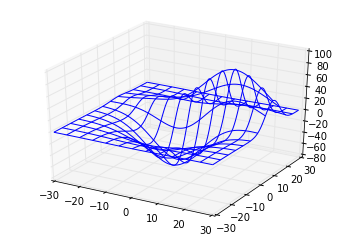

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()


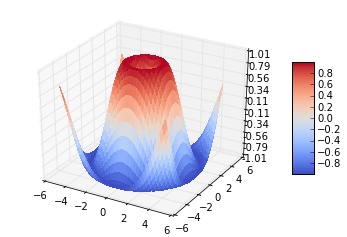

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [3]:
# (*) Import plotly package
import plotly

# Check plolty version (if not latest, please upgrade)
plotly.__version__


# (*) To communicate with Plotly's server, sign in with credentials file
import plotly.plotly as py

# (*) Useful Python/Plotly tools
import plotly.tools as tls

# (*) Graph objects to piece together plots
from plotly.graph_objs import *

import numpy as np  # (*) numpy for math functions and arrays

In [4]:

# (*) Import the math functions needed in this cell
from numpy import pi, cos, exp

# Define the function to be plotted
def fxy(x, y):
    A = 1  # choose a maximum amplitude 
    return A*(cos(pi*x*y))**2 * exp(-(x**2+y**2)/2.)

In [5]:
# Choose length of square domain, make row and column vectors
L = 4
x = y = np.arange(-L/2., L/2., 0.1)  # use a mesh spacing of 0.1
yt = y[:, np.newaxis]  # (!) make column vector

# Get surface coordinates!
z = fxy(x, yt)

In [6]:
trace1 = Surface(
    z=z,  # link the fxy 2d numpy array
    x=x,  # link 1d numpy array of x coords
    y=y   # link 1d numpy array of y coords
)

# Package the trace dictionary into a data object
data = Data([trace1])

In [7]:

# Dictionary of style options for all axes
axis = dict(
    showbackground=True, # (!) show axis background
    backgroundcolor="rgb(204, 204, 204)", # set background color to grey
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
)

# Make a layout object
layout = Layout(
    title='$f(x,y) = A \cos(\pi x y) e^{-(x^2+y^2)/2}$', # set plot title
    scene=Scene(  # (!) axes are part of a 'scene' in 3d plots
        xaxis=XAxis(axis), # set x-axis style
        yaxis=YAxis(axis), # set y-axis style
        zaxis=ZAxis(axis)  # set z-axis style
    )
)

In [8]:

# Make a figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
py.iplot(fig, filename='s8_surface')